In [1]:
import os.path
import base64
from email.mime.text import MIMEText
from google.oauth2.credentials import Credentials
from googleapiclient.discovery import build


In [2]:
### Getting Path of current file
import os
import sys
from pathlib import Path

path = Path(os.path.dirname(os.getcwd()))
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/saideepbunny/Projects/Email-Assistant-using-Generative-AI


In [3]:

def send_email(to, subject, message_text):
    creds = Credentials.from_authorized_user_file(f'{path}/config/token.json')
    service = build('gmail', 'v1', credentials=creds)

    message = MIMEText(message_text)
    message['to'] = to
    message['from'] = "me"
    message['subject'] = subject
    raw_message = base64.urlsafe_b64encode(message.as_bytes()).decode()
    send_message = {'raw': raw_message}

    result = service.users().messages().send(userId="me", body=send_message).execute()
    print(f"✅ Email sent! Message ID: {result['id']}")

if __name__ == '__main__':
    send_email(
        to='arikonthamsaideep@gmail.com',
        subject='Test Email from Python',
        message_text='This is a test email using Gmail API.'
    )


✅ Email sent! Message ID: 197ead9e7e41ead0


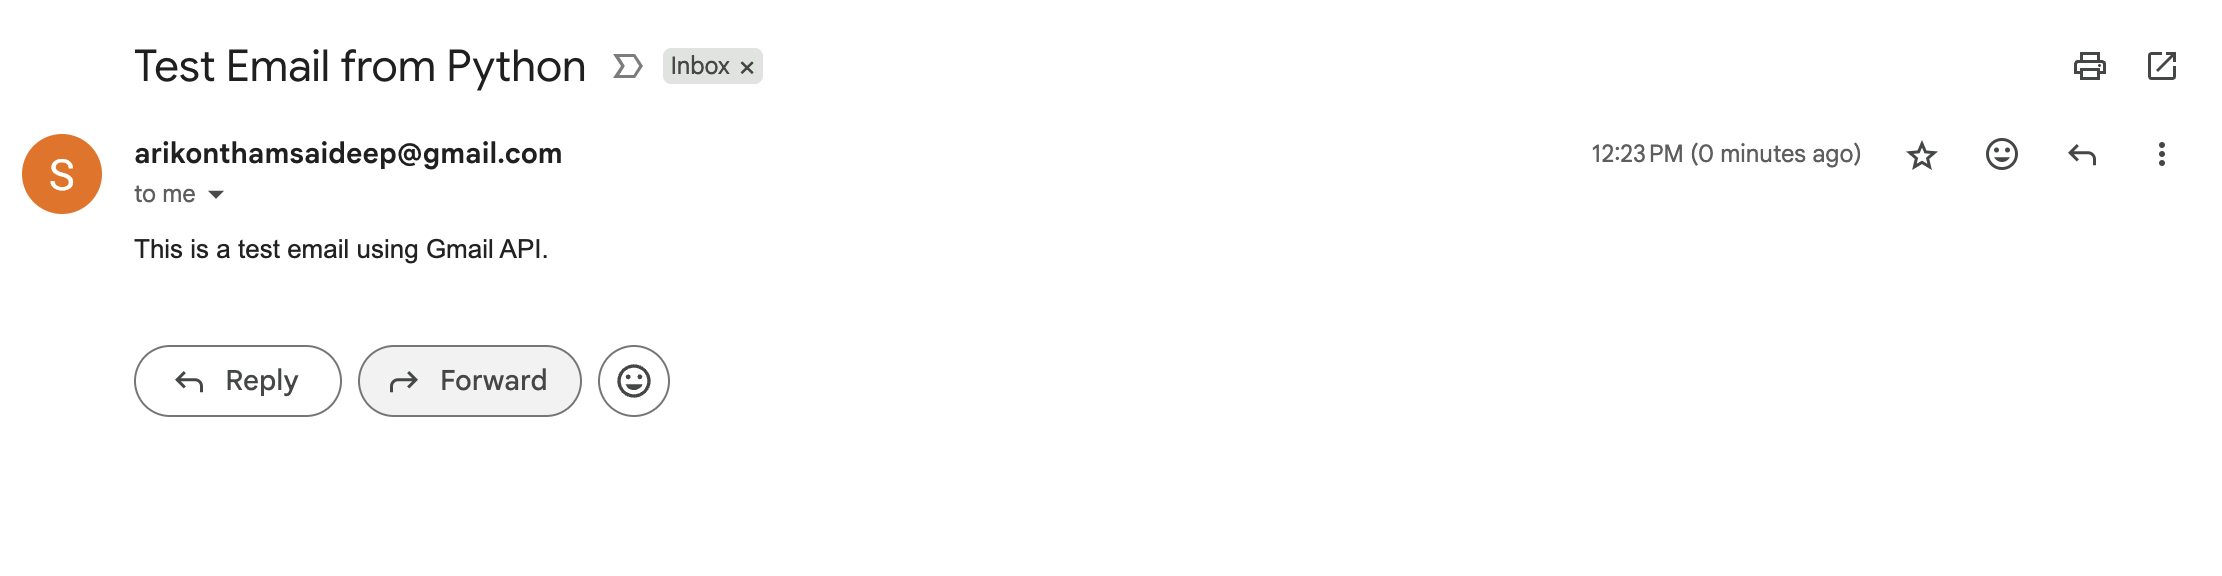